## Q4

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import math 
%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
item_data = []
with open("table1.txt") as inputfile:
   for line in inputfile:
       item_data.append(line.strip().split(','))

In [4]:
item_data

[['M', 'O', 'N', 'K', 'E', 'Y'],
 ['D', 'O', 'N', 'K', 'E', 'Y'],
 ['M', 'A', 'K', 'E'],
 ['M', 'U', 'C', 'K', 'Y'],
 ['C', 'O', 'O', 'K', 'I', 'E']]

In [5]:
te = TransactionEncoder() 
tedata = te.fit(item_data).transform(item_data)
itemdf = pd.DataFrame(tedata, columns=te.columns_)
itemdf

,A,C,D,E,I,K,M,N,O,U,Y
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [6]:
sup = itemdf.sum()
sup

A    1
C    2
D    1
E    4
I    1
K    5
M    3
N    2
O    3
U    1
Y    3
dtype: int64

In [8]:
# minsup is 3, so the minimum relative support is 0.6
fi = apriori(itemdf, min_support=0.6, use_colnames=True)
fi

,support,itemsets
0,0.8,(E)
1,1.0,(K)
2,0.6,(M)
3,0.6,(O)
4,0.6,(Y)
5,0.8,"(E, K)"
6,0.6,"(O, E)"
7,0.6,"(M, K)"
8,0.6,"(O, K)"
9,0.6,"(Y, K)"


## Q5

## Q5
## Q5.a. histogram pruducts per order

In [2]:
import numpy as np
import pandas as pd

order_train_small = pd.read_csv("instacart-small/order_products__train_small.csv")
order_train_med = pd.read_csv("instacart-small/orders_product__train_med.csv")
order_small = pd.read_csv("instacart-small/orders_small.csv")


In [3]:
import numpy as np

od_small = order_train_small.groupby("order_id").count()
average_small = np.average(od_small["product_id"])
od_med = order_train_med.groupby("order_id").count()
average_med = np.average(od_med["product_id"])

No handles with labels found to put in legend.


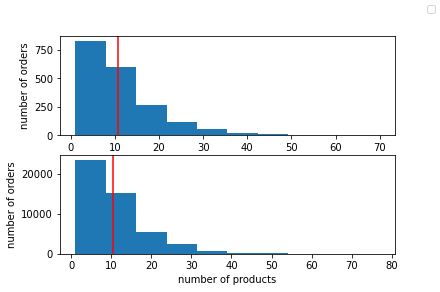

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2)
ax[0].hist(od_small["product_id"], bins=10)
ax[0].axvline(x=average_small,color="r")
ax[0].set_xlabel("number of products")
ax[0].set_ylabel("number of orders")

ax[1].hist(od_med["product_id"], bins=10)
ax[1].axvline(x=average_med,color="r")
ax[1].set_xlabel("number of products")
ax[1].set_ylabel("number of orders")
fig.legend()

## Q5.b

In [5]:
prod_small = order_train_small.groupby("product_id").count()
prod_small = prod_small.sort_values("order_id", ascending=False)
top15 = prod_small.iloc[:15]
total_small = prod_small.sum(axis=0)["order_id"]
total_small

20001

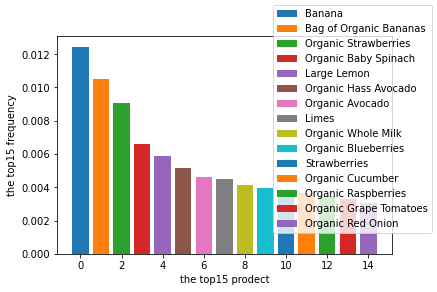

In [7]:
products=pd.read_csv("instacart-small/products.csv")
fig, ax = plt.subplots(1)

for i in range(len(top15.index)):
    name=products["product_name"].values[prod_small.index[i]-1]
    ax.bar(i, (top15["order_id"].to_numpy()[i])/total_small,label=name)
ax.set_xlabel("the top15 prodect")
ax.set_ylabel("the top15 frequency")
fig.legend()

## Q5.c



